

### Similitud de palabras
### Mineria de datos
#### Camacho Gonzalez Pablo



### 1. Usando Word2vec

In [1]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pandas as pd

data =  pd.read_csv('CLSR-EK/MC30.csv', delimiter = ';')
palabras = data.iloc[:20,:2]


In [2]:
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [3]:
##Similitud para 20 palabras en ingles
sim_word2 = []
for xs in range(20):
    sim = model.similarity(palabras.iloc[xs][0], palabras.iloc[xs][1])
    print('(' + palabras.iloc[xs][0] +' ,'+ palabras.iloc[xs][1] + ') = ' + str(sim))
    sim_word2.append(sim)
    

(asylum ,madhouse) = 0.2525393
(bird ,cock) = 0.36290243
(bird ,crane) = 0.30286193
(boy ,lad) = 0.5886159
(brother ,monk) = 0.2232002
(car ,automobile) = 0.5838368
(cemetery ,woodland) = 0.38192508
(chord ,smile) = 0.14869237
(coast ,forest) = 0.2360979
(coast ,hill) = 0.16115776
(coast ,shore) = 0.5083667
(crane ,implement) = 0.023186153
(food ,fruit) = 0.3740926
(food ,rooster) = 0.11830647
(forest ,graveyard) = 0.22901122
(furnace ,stove) = 0.60839105
(gem ,jewel) = 0.6210811
(glass ,magician) = 0.037224907
(journey ,car) = 0.09849626
(journey ,voyage) = 0.68308526


### 2. Usando GloVe

In [4]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_input_file = 'glove.840B.300d.txt'
word2vec_output_file = 'glove.840B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)
filename = 'glove.840B.300d.txt.word2vec'
model1 = KeyedVectors.load_word2vec_format(filename, binary=False)
print(model1)

##Similitud para 20 palabras en ingles
sim_glove = []
for xs in range(20):
    sim = model1.similarity(palabras.iloc[xs][0], palabras.iloc[xs][1])
    print('(' + palabras.iloc[xs][0] +' ,'+ palabras.iloc[xs][1] + ') = ' + str(sim))
    sim_glove.append(sim)

(asylum ,madhouse) = 0.35605606
(bird ,cock) = 0.2175923
(bird ,crane) = 0.45388183
(boy ,lad) = 0.675714
(brother ,monk) = 0.33810928
(car ,automobile) = 0.7535857
(cemetery ,woodland) = 0.36123264
(chord ,smile) = 0.19790427
(coast ,forest) = 0.40763992
(coast ,hill) = 0.45139647
(coast ,shore) = 0.7322569
(crane ,implement) = 0.15489374
(food ,fruit) = 0.5550151
(food ,rooster) = 0.1914624
(forest ,graveyard) = 0.33834884
(furnace ,stove) = 0.63431245
(gem ,jewel) = 0.6481918
(glass ,magician) = 0.12764297
(journey ,car) = 0.2846713
(journey ,voyage) = 0.6463992


### 3. Usando Fasttext

In [5]:
from gensim.models.wrappers import FastText

model2 =  KeyedVectors.load_word2vec_format('crawl-300d-2M.vec', binary = False)
print(model2)

##Similitud para 20 palabras en ingles
sim_fast = []
for xs in range(20):
    sim = model2.similarity(palabras.iloc[xs][0], palabras.iloc[xs][1])
    print('(' + palabras.iloc[xs][0] +' ,'+ palabras.iloc[xs][1] + ') = ' + str(sim))
    sim_fast.append(sim)

(asylum ,madhouse) = 0.49484956
(bird ,cock) = 0.3203013
(bird ,crane) = 0.4263681
(boy ,lad) = 0.66020894
(brother ,monk) = 0.29425547
(car ,automobile) = 0.6813087
(cemetery ,woodland) = 0.31181008
(chord ,smile) = 0.11594116
(coast ,forest) = 0.28967166
(coast ,hill) = 0.36985782
(coast ,shore) = 0.6282539
(crane ,implement) = 0.10043778
(food ,fruit) = 0.34786722
(food ,rooster) = 0.160572
(forest ,graveyard) = 0.27183968
(furnace ,stove) = 0.5682367
(gem ,jewel) = 0.7255655
(glass ,magician) = 0.17804337
(journey ,car) = 0.24229912
(journey ,voyage) = 0.6488573


### 4. Usando WordNet con palabras en ingles

In [13]:
from nltk.corpus import wordnet as wn


##Similitud para 20 palabras en ingles
sim_wordN = []
for ts in range(20):
    pa = palabras.iloc[ts][0] 
    pb = palabras.iloc[ts][1]
    sim = 0
    syna = None
    synb = None
    for xs in wn.synsets(pa):
        for ys in wn.synsets(pb):
            s = xs.path_similarity(ys)
            if s == None:
                s = -1
            if s > sim:
                sim = s
                syna = xs
                synb = ys
    print('(' + pa +' ,'+ pb  + ') = ' + str(sim))
    sim_wordN.append(sim)

(asylum ,madhouse) = 0.5
(bird ,cock) = 0.5
(bird ,crane) = 0.25
(boy ,lad) = 0.5
(brother ,monk) = 0.5
(car ,automobile) = 1.0
(cemetery ,woodland) = 0.1111111111111111
(chord ,smile) = 0.125
(coast ,forest) = 0.16666666666666666
(coast ,hill) = 0.2
(coast ,shore) = 0.5
(crane ,implement) = 0.2
(food ,fruit) = 0.1
(food ,rooster) = 0.0625
(forest ,graveyard) = 0.1111111111111111
(furnace ,stove) = 0.1
(gem ,jewel) = 1.0
(glass ,magician) = 0.125
(journey ,car) = 0.08333333333333333
(journey ,voyage) = 0.5


### 4. Usando WordNet con palabras en español

In [18]:
palabras_es = data.iloc[:20,6:8]


##Similitud para 20 palabras en español
sim_wordNE= []
for ts in range(20):
    pa = palabras_es.iloc[ts][0] 
    pb = palabras_es.iloc[ts][1]
    sim = 0
    syna = None
    synb = None
    for xs in wn.synsets(pa, lang='spa'):
        for ys in wn.synsets(pb, lang='spa'):
            s = xs.path_similarity(ys)
            if s == None:
                s = -1
            if s > sim:
                sim = s
                syna = xs
                synb = ys
    print('(' + pa +' ,'+ pb  + ') = ' + str(sim))
    sim_wordNE.append(sim)

(asilo ,manicomio) = 0
(pajaro ,gallo) = 0
(pajaro ,grulla) = 0
(chico ,muchacho) = 1.0
(hermano ,monje) = 0.16666666666666666
(coche ,automovil) = 0
(cementerio ,bosque) = 0.1111111111111111
(acorde ,sonrisa) = 0
(costa ,bosque) = 0.16666666666666666
(costa ,colina) = 0.2
(costa ,orilla) = 0.5
(grua ,implemento) = 0
(comida ,fruta) = 0.3333333333333333
(comida ,gallo) = 0.0625
(forestales ,cementerio) = 0
(horno ,estufa) = 0
(gema ,joya) = 0
(vidrio ,mago) = 0.125
(coche ,viaje) = 0.07142857142857142
(viaje ,pasaje) = 0.2


### Evaluando los modelos con correlacion de Pearson

<function matplotlib.pyplot.show(*args, **kw)>

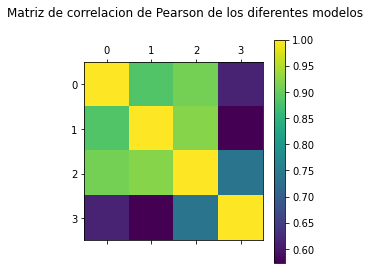

In [38]:
import numpy as np
import matplotlib.pyplot as plt


w2 =  pd.DataFrame(sim_word2, columns=['word2vec'])
glove =  pd.DataFrame(sim_glove, columns=['GloVe'])
fast = pd.DataFrame(sim_fast, columns=['fasText'])
word = pd.DataFrame(sim_wordN, columns=['WordNet'])

data_sim = pd.concat([w2,glove,fast,word], axis=1)


plt.matshow(data_sim.corr())
plt.colorbar()
plt.suptitle('Matriz de correlacion de Pearson de los diferentes modelos')
plt.show



### Comentarios finales
 
A Pesar de que el índice de correlación de Pearson vemos que WordNet (columna y renglón 3) ese fue el método donde si analizamos los valores dados para cada par de palabras se acercan más a la realidad, por ejemplo :
 
WordNet al par (car ,automobile) = 1.0 mientras que GloVe (car ,automobile) = 0.7535857, aquí podemos ver que WordNet da un valor más alto de similitud entre ambas palabras que cualquiera de los otres tres modelos.
